In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
columns=["sam_code_num","Clump_thick","Uni_of_Cell_Size","Uni_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoes","Class"]
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=columns,na_values="?")
data.head()

,sam_code_num,Clump_thick,Uni_of_Cell_Size,Uni_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoes,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sam_code_num                 699 non-null    int64  
 1   Clump_thick                  699 non-null    int64  
 2   Uni_of_Cell_Size             699 non-null    int64  
 3   Uni_of_Cell_Shape            699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoes                       699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [41]:
data.isnull().sum()

sam_code_num                    0
Clump_thick                     0
Uni_of_Cell_Size                0
Uni_of_Cell_Shape               0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoes                          0
Class                           0
dtype: int64

In [42]:
data.Bare_Nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [43]:
data.Bare_Nuclei.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_Nuclei, dtype: float64

In [44]:
data.Bare_Nuclei.fillna(3.544656,inplace=True)

In [45]:
data.Bare_Nuclei.isnull().sum()

0

In [46]:
data.isnull().sum()

sam_code_num                   0
Clump_thick                    0
Uni_of_Cell_Size               0
Uni_of_Cell_Shape              0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoes                         0
Class                          0
dtype: int64

In [47]:
data.Clump_thick.describe()

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Clump_thick, dtype: float64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sam_code_num                 699 non-null    int64  
 1   Clump_thick                  699 non-null    int64  
 2   Uni_of_Cell_Size             699 non-null    int64  
 3   Uni_of_Cell_Shape            699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  699 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoes                       699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x4365355340>,
 'caps': [<matplotlib.lines.Line2D at 0x4365355a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x4365345f70>],
 'medians': [<matplotlib.lines.Line2D at 0x43653611c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x4365361550>],
 'means': []}

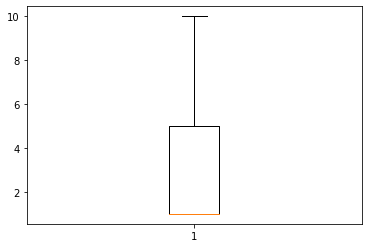

In [49]:
plt.boxplot(data.Bare_Nuclei)

In [50]:
from sklearn.model_selection import train_test_split

In [57]:
y=data.Class
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


In [58]:
x=data.drop('Class',axis=1)
print(x)

     sam_code_num  Clump_thick  Uni_of_Cell_Size  Uni_of_Cell_Shape  \
0         1000025            5                 1                  1   
1         1002945            5                 4                  4   
2         1015425            3                 1                  1   
3         1016277            6                 8                  8   
4         1017023            4                 1                  1   
..            ...          ...               ...                ...   
694        776715            3                 1                  1   
695        841769            2                 1                  1   
696        888820            5                10                 10   
697        897471            4                 8                  6   
698        897471            4                 8                  8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    1                            2          1.0   
1          

In [59]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state =100)

In [60]:
print(train_x)
print(test_x)
print(train_y)
print(test_y)

     sam_code_num  Clump_thick  Uni_of_Cell_Size  Uni_of_Cell_Shape  \
491       1119189            5                 8                  9   
614       1031608            2                 1                  1   
277        452264            1                 1                  1   
404       1223543            1                 2                  1   
529       8233704            4                 1                  1   
..            ...          ...               ...                ...   
578        695219            1                 1                  1   
53        1110503            5                 5                  5   
350        836433            5                 1                  1   
79        1136142            2                 1                  1   
520        333093            1                 1                  1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
491                  4                            3         10.0   
614        

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(train_x,train_y)
model.score(train_x,train_y)

0.960644007155635

In [70]:
predicted_value=model.predict(test_x)
print(predicted_value)

[2 4 4 4 2 2 2 2 4 4 4 2 2 2 4 2 2 4 2 4 4 2 2 2 4 4 4 2 2 4 2 4 2 4 4 2 4
 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2 4 4 4 2 4 2 2 4 2 4 2 4
 4 2 2 2 4 2 2 2 2 2 4 4 2 2 2 4 2 4 2 2 4 4 2 2 2 2 4 4 4 4 4 4 2 2 4 2 2
 2 2 2 2 2 4 4 4 4 2 4 2 2 2 2 2 4 2 2 4 4 2 4 4 4 4 2 4 2]


In [71]:
probability=model.predict_proba(test_x)
print(probability)

[[9.92946195e-01 7.05380514e-03]
 [1.68364140e-01 8.31635860e-01]
 [4.81545925e-04 9.99518454e-01]
 [4.13413785e-04 9.99586586e-01]
 [9.96742908e-01 3.25709172e-03]
 [9.94395341e-01 5.60465943e-03]
 [9.95584301e-01 4.41569905e-03]
 [9.97675597e-01 2.32440340e-03]
 [1.27656106e-01 8.72343894e-01]
 [2.10234837e-01 7.89765163e-01]
 [1.73131011e-03 9.98268690e-01]
 [9.98722896e-01 1.27710436e-03]
 [9.98534643e-01 1.46535724e-03]
 [9.96055544e-01 3.94445635e-03]
 [5.16575047e-04 9.99483425e-01]
 [9.97690400e-01 2.30959974e-03]
 [9.81239176e-01 1.87608243e-02]
 [9.64603148e-02 9.03539685e-01]
 [6.94607800e-01 3.05392200e-01]
 [2.92959864e-03 9.97070401e-01]
 [3.76521062e-07 9.99999623e-01]
 [9.99048952e-01 9.51047899e-04]
 [9.71796005e-01 2.82039946e-02]
 [9.67689298e-01 3.23107022e-02]
 [5.64583876e-05 9.99943542e-01]
 [1.40290736e-05 9.99985971e-01]
 [4.65136041e-04 9.99534864e-01]
 [9.81297424e-01 1.87025761e-02]
 [8.56046495e-01 1.43953505e-01]
 [5.81602228e-04 9.99418398e-01]
 [9.913512